In [1]:
from keras.applications.resnet_v2 import ResNet50V2,preprocess_input
from tensorflow.keras.layers import Lambda,Input,Dense,Flatten
from tensorflow.keras.models import Model 
from keras.preprocessing import image
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

C:\Users\vknsr\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
image_size=[224,224]
train='C:/Users/vknsr/Downloads/training'
test='C:/Users/vknsr/Downloads/testing'
# we r not performing training so we are taking weights from imagenet include_top is remove output layer
resnet=ResNet50V2(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable=False

In [5]:
folders=glob('C:/Users/vknsr/Downloads/training/*')

In [6]:
folders

['C:/Users/vknsr/Downloads/training\\cat',
 'C:/Users/vknsr/Downloads/training\\dog']

In [7]:
x=Flatten()(resnet.output)

In [8]:
prediction=Dense(len(folders),activation='sigmoid')(x)

In [10]:
model=Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [15]:
training_set=train_datagen.flow_from_directory('C:/Users/vknsr/Downloads/training',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('C:/Users/vknsr/Downloads/testing',target_size=(224,224),batch_size=32,class_mode='categorical')


Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [17]:
resnet=model.fit_generator(training_set,epochs=10,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set))

<ipython-input-17-5a7368fed401>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet=model.fit_generator(training_set,epochs=10,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 4.6465e-06 - accuracy: 1.0000 - val_loss: 0.6572 - val_accuracy: 0.9000
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 2.1250e-07 - accuracy: 1.0000 - val_loss: 0.8156 - val_accuracy: 0.9000
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 1.3614e-08 - accuracy: 1.0000 - val_loss: 0.9571 - val_accuracy: 0.9000
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 1.6300e-09 - accuracy: 1.0000 - val_loss: 1.0823 - val_accuracy: 0.9000
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 1.9309e-10 - accuracy: 1.0000 - val_loss: 1.1932 - val_accuracy: 0.9000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 7.1584e-10 - accuracy: 1.0000 - val_loss: 1.2916 - val_accuracy: 0.9000
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 1.2433e-11 - accuracy: 1.0000 - val_loss: 1.3793 - val_accuracy: 0.9000
Epoch 8/10
1/

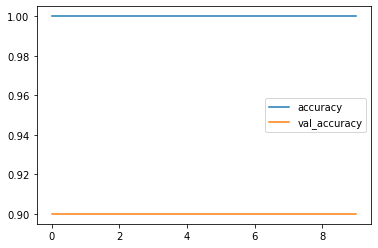

In [18]:
plt.plot(resnet.history['accuracy'],label='accuracy')
plt.plot(resnet.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

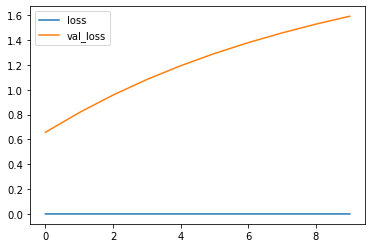

In [19]:
plt.plot(resnet.history['loss'],label='loss')
plt.plot(resnet.history['val_loss'],label='val_loss')
plt.legend()
plt.show()